In [ ]:
!pip install yfinance

In [87]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Ya que tenemos el sector más estable, vamos a analizarlo y saber cuales empresas nos conviene hacer la inversión**

In [72]:
# Definir la lista de símbolos de las empresas que conforman el sector XLV
symbols = ['JNJ', 'UNH', 'PFE', 'MRK', 'ABT', 'TMO', 'MDT', 'AMGN', 'ABBV', 'BMY', 'CVS', 'ANTM', 'GILD', 'CI', 'ISRG', 'DHR', 'SYK', 'VRTX', 'BIIB', 'LLY', 'BDX', 'HCA', 'ZBH', 'REGN', 'HUM', 'IDXX', 'EW', 'ALGN', 'BAX', 'ILMN', 'LH']

In [73]:
# Definir la fecha de inicio y final
start_date = '2000-01-01'
end_date = '2022-12-31'

In [74]:
# Crear un DataFrame vacío para almacenar los datos de cada empresa
df_sector_xlv = pd.DataFrame()

In [ ]:
# Iterar sobre cada símbolo y descargar los datos históricos de precios
for symbol in symbols:
    # Descargar los datos históricos de precios de Yahoo Finance
    data = yf.download(symbol, start=start_date, end=end_date)
    
    # Seleccionar las columnas requeridas
    data = data[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
    
    # Agregar una columna con el símbolo de la empresa
    data['Symbol'] = symbol
    
    # Concatenar los datos de la empresa al DataFrame del sector XLV
    df_sector_xlv = pd.concat([df_sector_xlv, data])

In [77]:
# Ordenar los datos por fecha y símbolo
df_sector_xlv = df_sector_xlv.sort_index(level=['Symbol', 'Date'])

In [78]:
df_sector_xlv

,High,Low,Open,Close,Volume,Adj Close,Symbol
Date,,,,,,,
2000-01-03,46.875000,45.781250,46.562500,46.093750,4642400.0,25.458212,JNJ
2000-01-03,1.800781,1.716797,1.785156,1.759766,54070400.0,1.358667,GILD
2000-01-03,6.757813,6.617188,6.640625,6.718750,3431200.0,5.503510,UNH
2000-01-03,20.093750,18.468750,20.000000,18.906250,6503000.0,13.424739,CVS
2000-01-03,61.746532,60.556812,61.151672,61.330132,3568588.0,26.560553,BMY
...,...,...,...,...,...,...,...
2022-12-30,513.489990,507.100006,513.239990,512.190002,398600.0,512.190002,HUM
2022-12-30,555.000000,545.250000,552.799988,550.690002,686000.0,550.690002,TMO
2022-12-30,77.910004,76.860001,77.559998,77.720001,4991300.0,77.720001,MDT


In [79]:
# Revisar si hay valores nulos
df_sector_xlv.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Symbol       0
dtype: int64

In [80]:
# Guardar los datos en un archivo CSV
#df_sector_xlv.to_csv('sector_xlv.csv')

**Estos KPIs nos ayudarán tomar una decisión informada al elegir las empresas correctas para invertir**

In [81]:
# Llamar el archivo antes guardado para trabajar en local
df_sector_xlv1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projec02/sector_xlv.csv')

In [96]:
df_sector_xlv1.head(2)

,Date,High,Low,Open,Close,Volume,Adj Close,Symbol,Total Return,Precio Inicial,Precio Final,Retorno Total Acumulado,Volatilidad,P/E Ratio
0,2000-01-03,46.875000,45.781250,46.562500,46.093750,4642400.0,25.458212,JNJ,NaN,46.562500,176.649994,2.793825,39.152636,0.516937
1,2000-01-03,1.800781,1.716797,1.785156,1.759766,54070400.0,1.358667,GILD,NaN,1.785156,85.849998,47.091034,32.560329,0.043186


1. **Rendimiento total**: Es una medida simple del rendimiento de una inversión que tiene en cuenta tanto la apreciación del precio de las acciones como cualquier dividendo pagado. El rendimiento total se define como:

  Rendimiento total = (Precio de cierre ajustado final - Precio de cierre ajustado inicial + Dividendos) / Precio de cierre ajustado inicial

In [88]:
#Calculo el retorno total acumulado para cada símbolo con groupby
df_sector_xlv1['Precio Inicial'] = df_sector_xlv1.groupby('Symbol')['Open'].transform('first')
df_sector_xlv1['Precio Final'] = df_sector_xlv1.groupby('Symbol')['Close'].transform('last')
df_sector_xlv1['Retorno Total Acumulado'] = (df_sector_xlv1['Precio Final'] / df_sector_xlv1['Precio Inicial']) - 1

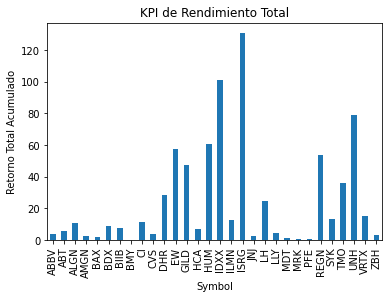

In [89]:
#Grafico
df_sector_xlv1.groupby('Symbol')['Retorno Total Acumulado'].last().plot(kind='bar')
plt.xlabel('Symbol')
plt.ylabel('Retorno Total Acumulado')
plt.title('KPI de Rendimiento Total')
plt.show()

Las 3 empresas con mejor rendimiento son:
1. **ISRG** Intuitive Surgical, Inc.
2. **IDXX** Laboratories, Inc.
3. **UNH** UnitedHealth Group Incorporated  

2. **Volatilidad**: Es una medida de la variabilidad del precio de las acciones. Una empresa con una volatilidad alta puede ser más riesgosa que una empresa con una volatilidad baja. La fórmula para la volatilidad es:

  Volatilidad = Desviación Estándar de los Precios de Cierre

In [91]:
# calculo la volatilidad para cada símbolo con groupby
df_sector_xlv1['Volatilidad'] = df_sector_xlv1.groupby('Symbol')['Close'].transform('std')

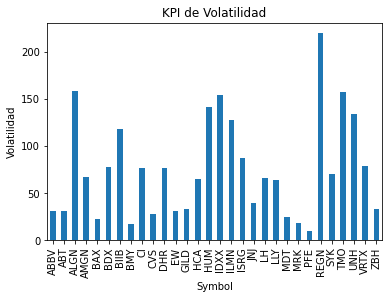

In [92]:
#Grafico
df_sector_xlv1.groupby('Symbol')['Volatilidad'].last().plot(kind='bar')
plt.xlabel('Symbol')
plt.ylabel('Volatilidad')
plt.title('KPI de Volatilidad')
plt.show()

Las empresas con menor volatibilidad son:
1. **PFE** Pfizer Inc. 
2. **MRK** Merck & Co. Inc.
3. **BMY** Bristol-Myers Squibb Company

3. **Ratio Precio-Ganancias (P/E Ratio)**: Es una medida de la valuación relativa de una empresa en el mercado de acciones. Puede indicar si una empresa está sobrevalorada o subvaluada en comparación con sus pares. La fórmula para el P/E Ratio es:

  P/E Ratio = Precio Actual de las Acciones / Ganancias Por Acción (EPS)

In [94]:
# calculo el P/E Ratio para cada símbolo con groupby
df_sector_xlv1['P/E Ratio'] = df_sector_xlv1['Close'] / df_sector_xlv1.groupby('Symbol')['Close'].transform('mean')

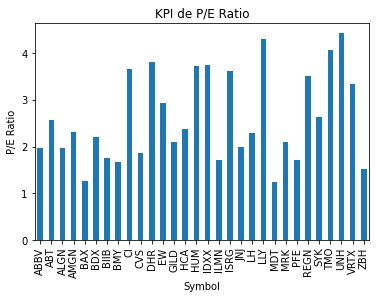

In [95]:
# Grafico
df_sector_xlv1.groupby('Symbol')['P/E Ratio'].last().plot(kind='bar')
plt.xlabel('Symbol')
plt.ylabel('P/E Ratio')
plt.title('KPI de P/E Ratio')
plt.show()

Las empresas con ratio mas elevado, o que tengan mejor ganancia por cada acción son:
1. **UNH** UnitedHealth Group Incorporated
2. **LLY** Eli Lilly and Company
3. **TMO** Thermo Fisher Scientific Inc.